In [1]:
using GraphViz

In [2]:
addprocs(5);

In [3]:
include("../daggen.jl")
using DagScheduler

In [4]:
isdir(".mempool") && rm(".mempool"; recursive=true)
runenv = RunEnv();

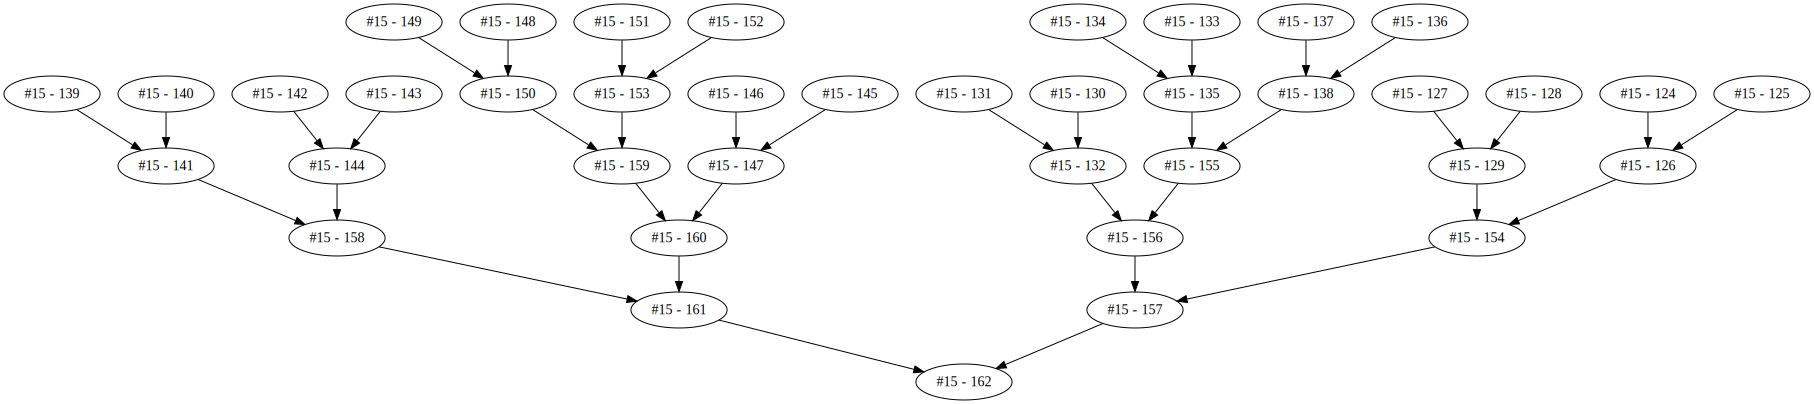

In [5]:
dag1 = gen_sort_dag(10^6, 40, 4, 1)
Graph(Dagger.show_plan(dag1))

In [7]:
using Interact, Reactive

INFO: Updating cache of Interact...
INFO: Installing Interact v0.6.3
INFO: Building Interact
INFO: Enabling widgetsnbextension
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
INFO: ipywidgets version found: 5.1.5
INFO: A compatible version of ipywidgets was found. All good.
INFO: Package database updated
INFO: METADATA is out-of-date — you may not have the latest version of Interact
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: No packages to install, update or remove
INFO: Package database updated
INFO: METADATA is out-of-date — you may not have the latest version of Reactive
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Precompiling module Interact.


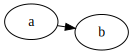

In [8]:
x = Signal(Graph("digraph { a->b }"))

In [9]:
push!(x, Graph("digraph {c->D}"))

In [ ]:
@time rundag(runenv, dag1)

In [ ]:
cleanup(runenv)
@everywhere MemPool.cleanup()

In [ ]:
rmprocs(workers())